このPython コードは、PyMC を使ってMCMCサンプリングを行います。
* 2025年8月時点では、Google Colaboratory環境では PyMC がそのまま使えますので、実行可能です。
* ローカルな計算機環境では、PyMC パッケージが含まれていないのが一般的です。
    * 例えば、Anaconda などの Distribution では、以下の例の様に、PyMC環境を用意する必要があります。
        ```
        conda create -c conda-forge -n pymc_env pymc
        conda activate pymc_env
        conda install conda-forge::ipywidgets
        conda install scikit-learn
        ```
        * これで VS codeの実行時のPython環境に、```pymc_env```を選択します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2Prior-060101Uniform/'
FileBaseName = '2Prior-060101Uniform'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
# https://docs.pymc.io/
import pymc as pm
import time
print('pymc       Ver.', pm.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.10.0
numpy      Ver. 1.26.4


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc       Ver. 5.16.1
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060101Uniform/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060101Uniform/


---
一様分布 $\mathcal{U}(\theta;a,b)$
$$
  \mathcal{U}(\theta;a,b)
    =
    \left\{
        \begin{array}{cl}
            \displaystyle
            \frac{1}{b-a}, &
            (a\leq\theta\leq{}b)
            \\[1.5em]
            0, &
            (\textrm{otherwise})
        \end{array}
    \right.
$$

In [4]:
############################################
def PUniform(x,a,b):
  rtn = np.zeros_like(x)
  rtn[ (x-b)*(x-a)<=0 ] = 1 /(b-a)
  return rtn

In [5]:
############################################
xx = np.linspace( -2.2, 2.2, num=221)
PUnfirm1 = PUniform(xx, -2.0, +2.0)

PyMC で用いる一様分布の例

In [6]:
############################################
with pm.Model() as  model:
    alpha = pm.Uniform('alpha', lower=-2, upper=2 )
    Uniform1 = pm.draw( alpha, draws=100000)

In [7]:
############################################
Uniform1_mean = np.mean( Uniform1 )
Uniform1_std  = np.std( Uniform1 )
print('Uniform1_mean = ',
           '%10.6f' % Uniform1_mean )
print('Uniform1_std  = ',
           '%10.6f' % Uniform1_std )

Uniform1_mean =    0.004949
Uniform1_std  =    1.154077


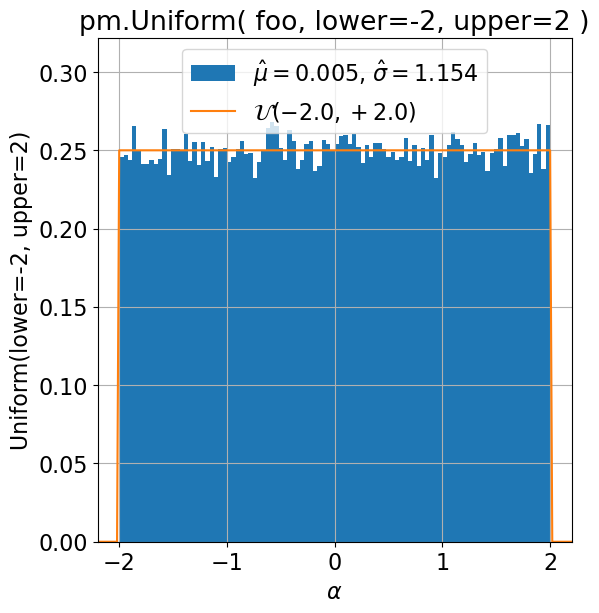

d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060101Uniform/2Prior-060101Uniform.pdf


In [8]:
############################################
x_lim  = 1.1 * max( np.abs(np.amax(Uniform1)),
                np.abs(np.amin(Uniform1)) )
############################################
plt.rcParams['font.size'] = 16
#
fig = plt.figure( figsize=(6,6) )
fig.subplots_adjust(left=0.18, right=0.97,
                    top=0.94, bottom=0.1)
#
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$\alpha$')
ax1.set_xlim( -x_lim, +x_lim )
ax1.set_ylabel(
    'Uniform(lower=-2, upper=2)')
(x_left, x_right) = ax1.set_xlim((-x_lim,
                                  +x_lim))
#
bin_values, bins, patches = ax1.hist(
        Uniform1,
        bins=100, density=True,
        label=r'$\hat{\mu}=%.3f$, $\hat{\sigma}=%.3f$'
        % (Uniform1_mean, Uniform1_std))
#
bin_values_max = np.amax( bin_values )
#
(y_bot, y_top) = ax1.set_ylim((0,bin_values_max * 1.2))
#
ax1.plot(xx, PUnfirm1, label=r'$\mathcal{U}(-2.0,+2.0)$' )
#
plt.title(
    'pm.Uniform( foo, lower=-2, upper=2 )')
#
plt.legend()
#
plt.grid(True)
#
plt.show()
#
######################################
######################################
pdfName = FilePath + FileBaseName + '.pdf'
fig.savefig( pdfName )
print( pdfName )